## **Medical Cost Prediction Model**

**This model is designed for making prediction of medical cost based on your gender, bmi, you have children or not, are smoker or not, and your region.**

### **Importing Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Taking Real - World Dataset**

In [ ]:
dataset = pd.read_csv("hf://datasets/Datasetssickness/MedicalCost/insurance.csv")
dataset.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


**Checking dataset has null values**

In [ ]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### **Checking Outliers**

**Display plot for each feature of dataset to see that data has outliers or not**

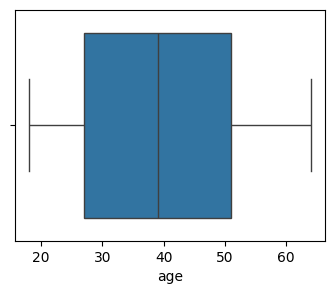

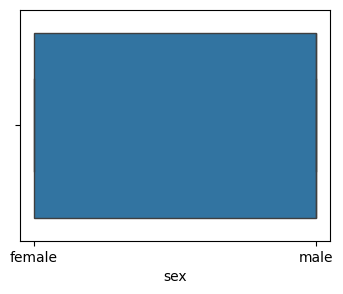

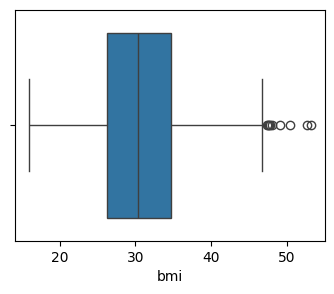

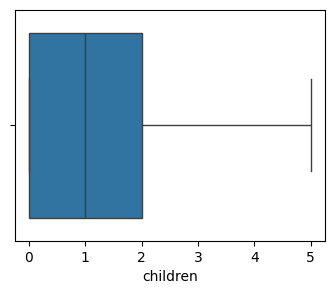

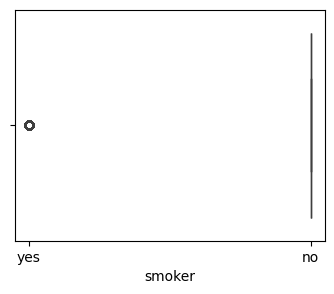

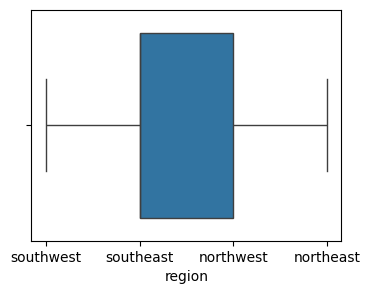

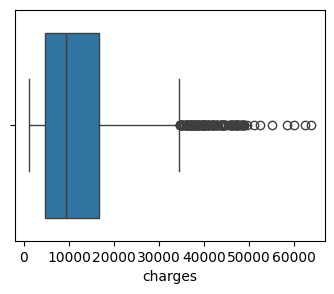

In [ ]:
for i in dataset.columns:
  plt.figure(figsize = (4, 3))
  sns.boxplot(x = dataset[i])
  plt.show()

### **Categorizing bmi and age variable**

**Making a function which categorizing bmi like if bmi is less than 18.5 it's underweight, bmi is between 18.5 to 25 it's normal, if bmi is between 25 to 30 it's overweight and bmi is greater than 30 it's obese and in last applying this function in dataset**

In [ ]:
def categorize_BMI(bmi):
  if bmi <18.5:
    return "Underweight"
  if bmi > 18.5 and bmi < 25:
    return "Normal"
  if bmi > 25 and bmi < 30:
    return "Overweight"
  if bmi > 30:
    return "Obese"
  else:
    return "Unknown"

dataset["categorize_bmi"] = dataset["bmi"].apply(categorize_BMI)

**Making a function which categorizing age like if age is less than 18 is child, if age is between 18 to 35 is young, if age is between 35 to 55 is middel and age is greater than 55 is older and in last applying this function in dataset**

In [ ]:
def categorize_age(age):
  if age <= 18:
    return "Child"
  if age > 18 and age < 35:
    return "Young"
  if age > 35 and age < 55:
    return "Middle"
  if age > 55:
    return "Elder"
  else:
    return "Unknown"

dataset["categorize_age"] = dataset["age"].apply(categorize_age)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,categorize_bmi,categorize_age
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Child
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Young
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young


**Dropping age and bmi variable from dataset because we have already categorized these in dataset**

In [ ]:
dataset.drop("age", axis = 1, inplace = True)
dataset.drop("bmi", axis = 1, inplace = True)

**Now dataset is looking like this**

In [ ]:
dataset.head(2)

,sex,children,smoker,region,charges,categorize_bmi,categorize_age
0,female,0,yes,southwest,16884.9240,Overweight,Young
1,male,1,no,southeast,1725.5523,Obese,Child


### **Encoding Categorical Variables**

**Encoding means convert categorical or string data to numerical form**

In [ ]:
object_cols = dataset.select_dtypes(include = "object").columns
object_cols

Index(['sex', 'smoker', 'region', 'categorize_bmi', 'categorize_age'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
dataset[object_cols] = encode.fit_transform(dataset[object_cols])

### **Checking Normal Distribution**

**Applying a loop to display all dataset variables in a graph form**

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


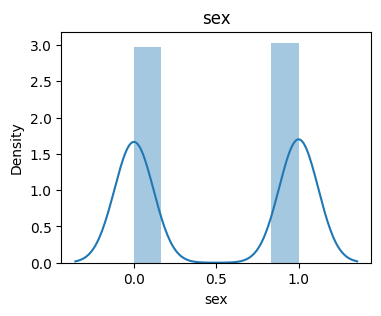

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


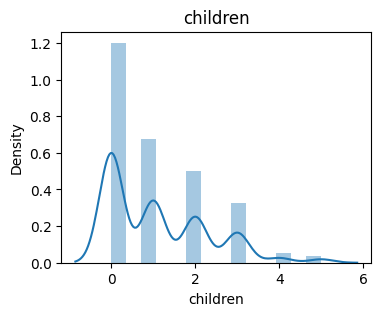

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


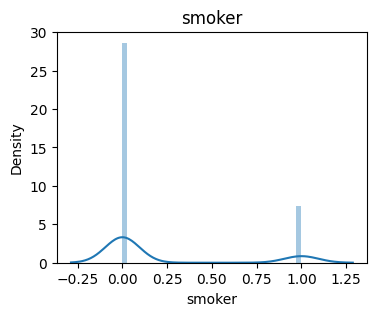

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


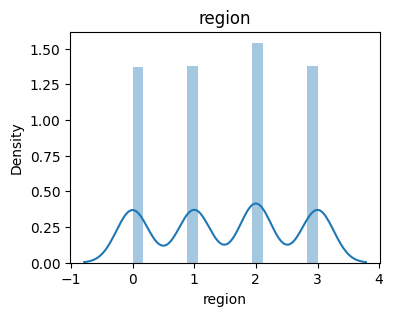

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


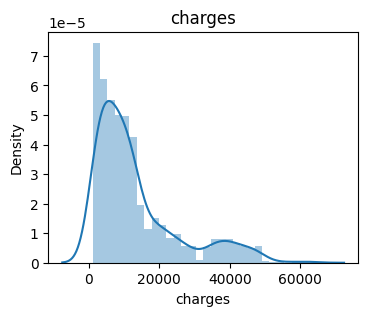

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


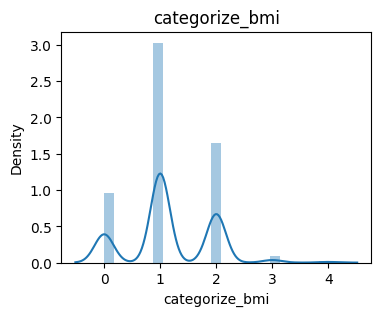

<ipython-input-62-8c8128acbf80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


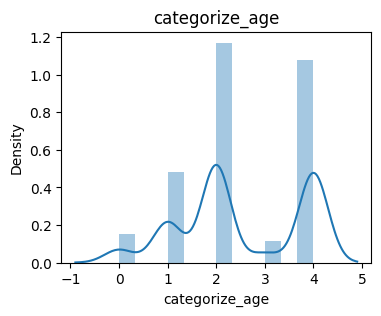

In [ ]:
for i in dataset.columns:
  plt.figure(figsize = (4, 3))
  plt.title(i)
  sns.distplot(dataset[i])
  plt.show()

**children, smoker, charges, Categorized_bmi and Categorized_age variable are not normally distributed and it possible that they have outliers**

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(lambda x : x ** 2)
transformer.fit(dataset[["children", "smoker", "charges", "categorize_bmi", "categorize_age"]])

FunctionTransformer(func=<function <lambda> at 0x7e19ddbdfc40>)

In [ ]:
dataset["children"] = transformer.transform(dataset[["children"]])
dataset["smoker"] = transformer.transform(dataset[["smoker"]])
dataset["charges"] = transformer.transform(dataset[["charges"]])
dataset["categorize_bmi"] = transformer.transform(dataset[["categorize_bmi"]])
dataset["categorize_age"] = transformer.transform(dataset[["categorize_age"]])

**Now data is looking like this**

In [ ]:
dataset

,sex,children,smoker,region,charges,categorize_bmi,categorize_age
0,0.0,0,1.0,3.0,2.851007e+08,4.0,16.0
1,1.0,1,0.0,2.0,2.977531e+06,1.0,0.0
2,1.0,9,0.0,2.0,1.979771e+07,1.0,16.0
3,1.0,0,0.0,1.0,4.833169e+08,0.0,16.0
4,1.0,0,0.0,1.0,1.495257e+07,4.0,16.0
...,...,...,...,...,...,...,...
1333,1.0,9,0.0,1.0,1.123716e+08,1.0,4.0
1334,0.0,0,0.0,0.0,4.866351e+06,1.0,0.0
1335,0.0,0,0.0,2.0,2.656357e+06,1.0,0.0
1336,0.0,0,0.0,3.0,4.031843e+06,4.0,16.0


### **Splitting the data**

**x is input and in it and drop charges variable because it's output feature**

In [ ]:
x = dataset.drop("charges", axis = 1, inplace = False)
y = dataset["charges"]

**Displaying through graph that data variables are lineary seperated or not here is different models for linear seperated data and non-linear seperated data**

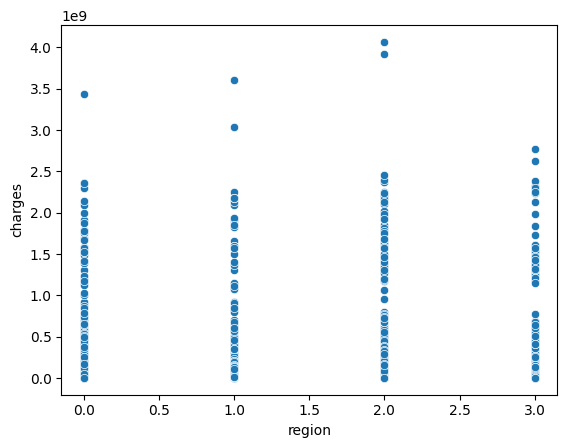

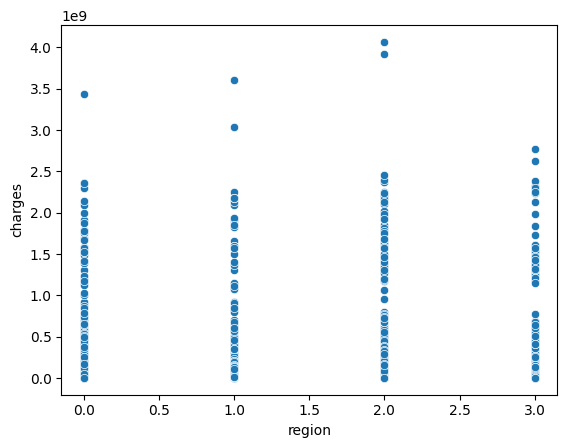

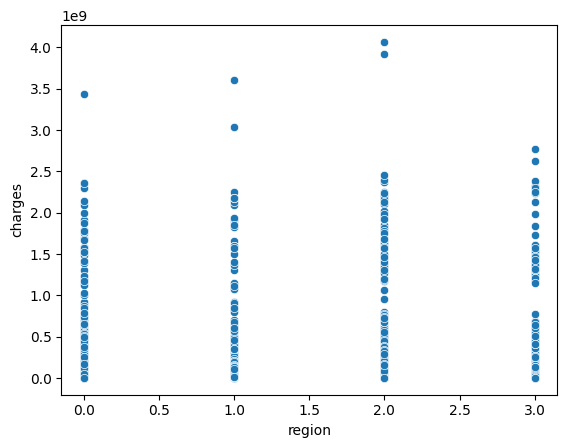

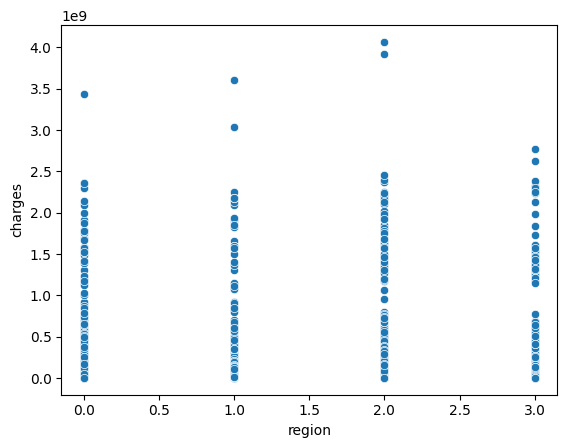

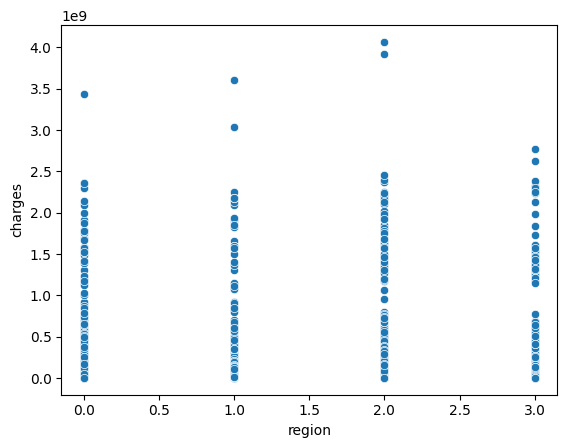

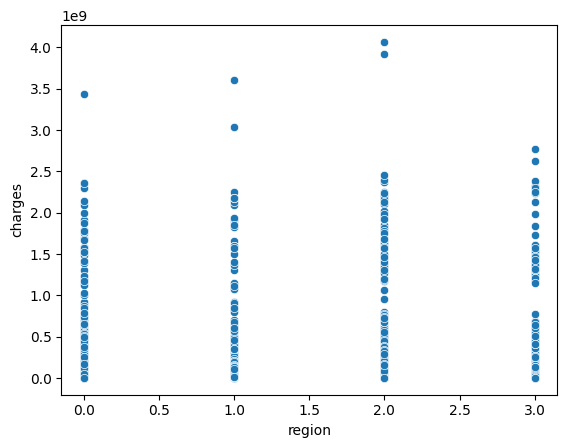

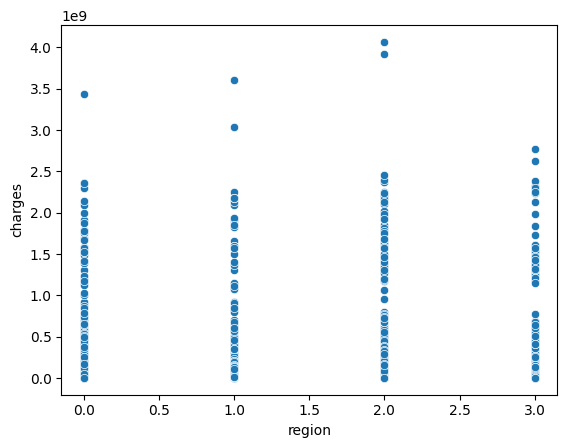

In [ ]:
for i in dataset.columns:
  sns.scatterplot(x = dataset['region'], y = y)
  plt.show()

**The data is in non-linear form**

### **Data for Model**

**This is input dataset**

In [ ]:
x.head()

,sex,children,smoker,region,categorize_bmi,categorize_age
0,0.0,0,1.0,3.0,4.0,16.0
1,1.0,1,0.0,2.0,1.0,0.0
2,1.0,9,0.0,2.0,1.0,16.0
3,1.0,0,0.0,1.0,0.0,16.0
4,1.0,0,0.0,1.0,4.0,16.0


**This is output dataset**

In [ ]:
y.head()

,charges
0,2.851007e+08
1,2.977531e+06
2,1.979771e+07
3,4.833169e+08
4,1.495257e+07


In [ ]:
x.shape, y.shape

((1338, 6), (1338,))

**Now splitting the dataset into training testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## **Training Model**

**I apply 4 different models and checking which one trained on model best**

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
tree_model.score(x_train, y_train) * 100 , tree_model.score(x_test, y_test) * 100

(93.07858023518719, 80.01338386321504)

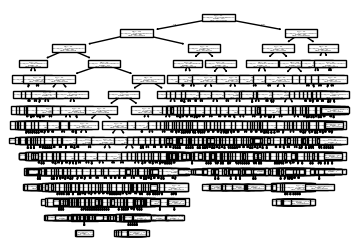

In [ ]:
plt.figure(figsize = (4, 3))
plot_tree(tree_model)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
tree_mse = mean_squared_error(y_test, tree_model.predict(x_test))
tree_mae = median_absolute_error(y_test, tree_model.predict(x_test))
tree_r2 = r2_score(y_test, tree_model.predict(x_test))

In [ ]:
tree_mse, tree_mae, tree_r2

(6.571923695851568e+16, 34466956.23447335, 0.808292980064263)

### **Decision Tree with Hyperparameter**

In [ ]:
tree_advance_model = DecisionTreeRegressor(criterion = "poisson", max_depth = 5, splitter = "random")
tree_advance_model.fit(x_train, y_train)
tree_advance_model.score(x_train, y_train) * 100 , tree_advance_model.score(x_test, y_test) * 100

(85.45768035147312, 85.49404362943916)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
tree_advance_mse = mean_squared_error(y_test, tree_advance_model.predict(x_test))
tree_advance_mae = median_absolute_error(y_test, tree_advance_model.predict(x_test))
tree_advance_r2 = r2_score(y_test, tree_advance_model.predict(x_test))

In [ ]:
tree_advance_mse, tree_advance_mae, tree_advance_r2

(4.972798514870998e+16, 54742323.86452993, 0.8549404362943916)

### **KNN Model**

**By applying loop and check that at which n_neighbor value model give its best result**

In [ ]:
for i in range(1, 20):
  from sklearn.neighbors import KNeighborsRegressor
  knn_check_model = KNeighborsRegressor(n_neighbors = i)
  knn_check_model.fit(x_train, y_train)
  print(i, knn_check_model.score(x_train, y_train) * 100 ,knn_check_model.score(x_test, y_test) * 100)

1 87.19081238554749 65.9774760602271
2 86.65766169326963 66.41127487286266
3 81.66985963874292 72.60748782737114
4 77.19947573457917 72.22965563153048
5 73.10572830301103 70.79154086157088
6 68.97616563419602 68.25790001095442
7 65.91831385614778 64.25388057637788
8 65.83836009073293 64.0626896058232
9 61.17660410989652 61.662450716501006
10 58.7127672947807 58.905323754840964
11 55.57286749250603 56.027891655241405
12 52.887887715738266 53.6384981974497
13 50.86056633463607 52.14833325318562
14 50.532750555074934 51.78656818823837
15 49.697146194467265 50.802039849542545
16 49.059287494284696 49.80245122949297
17 47.1125302351907 49.41158597977524
18 47.02982114694228 46.248809126422984
19 45.138927085671064 44.11759357312079


**At 3 it giving it's best result**

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.score(x_train, y_train) * 100 ,knn_model.score(x_test, y_test) * 100

(81.66985963874292, 72.60748782737114)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
knn_mse = mean_squared_error(y_test, knn_model.predict(x_test))
knn_mae = median_absolute_error(y_test, knn_model.predict(x_test))
knn_r2 = r2_score(y_test, knn_model.predict(x_test))

In [ ]:
knn_mse, knn_mae, knn_r2

(9.390449024586995e+16, 49089174.273574196, 0.7260748782737114)

### **SVR Model**

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel = "poly")
svr_model.fit(x_train, y_train)

SVR(kernel='poly')

In [ ]:
svr_model.score(x_train, y_train) * 100 ,svr_model.score(x_test, y_test) * 100

(-16.741837168127095, -15.665265797866335)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
svr_mse = mean_squared_error(y_test, svr_model.predict(x_test))
svr_mae = median_absolute_error(y_test, svr_model.predict(x_test))
svr_r2 = r2_score(y_test, svr_model.predict(x_test))

In [ ]:
svr_mse, svr_mae, svr_r2

(3.9651445766927814e+17, 78808232.77736202, -0.15665684142369707)